# Elektrische Feldlienen aus der gewöhnlichen Differentialgleichung

### Module

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
from scipy.integrate import ode as ode
py.init_notebook_mode(connected=True)

### Definitionen der Ladungen und elektrischen Felder

In [6]:
# Ladungsklasse
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos

# Ladung
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)

# Gesamtladung
def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E  = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex+E[0]
        Ey = Ey+E[1]
    return [ Ex, Ey ]

# Feldrichtung
def E_dir(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]

### Ladungskonfiguration und Bestimmung der resultierenden Feldlinien

In [187]:
# Zu zeigende Ladungen an bestimmten Positionen
charges = [charge( 1, [0.50, 0.50]),
           charge(-1, [0.26, 0.76]),
           charge( 1, [0.26, 0.16]),
           charge(-1, [0.76, 0.26]) ]
"""
# Dipol
charges = [charge(1, [0.6,0.5]),
          charge(-1, [0.4,0.5])]
"""

# Auflösung der Feldlinien
R = 0.003
# Anzahl der Feldlinien
A = 20

# Berechnungsloop für die Feldlinien
xs, ys = [], []
for C in charges:
    dt = 0.8*R
    if C.q < 0:
        continue

    for alpha in np.linspace(0, 2*np.pi*31/32, A):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [ C.pos[0] + np.cos(alpha)*R ]
        y = [ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        cnt = 0
        
        while r.successful():
            Enorm = E_total(r.y[0],r.y[1],charges)
            Enorm = (Enorm[0]**2 + Enorm[1]**2)**0.5
            a = 5
            dt = R*a*Enorm**(-0.4)
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge = True
            if hit_charge:
                break
                
        xs.append(x)
        ys.append(y)

### Darstellung

/home/quentin/tensor/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning:

Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'



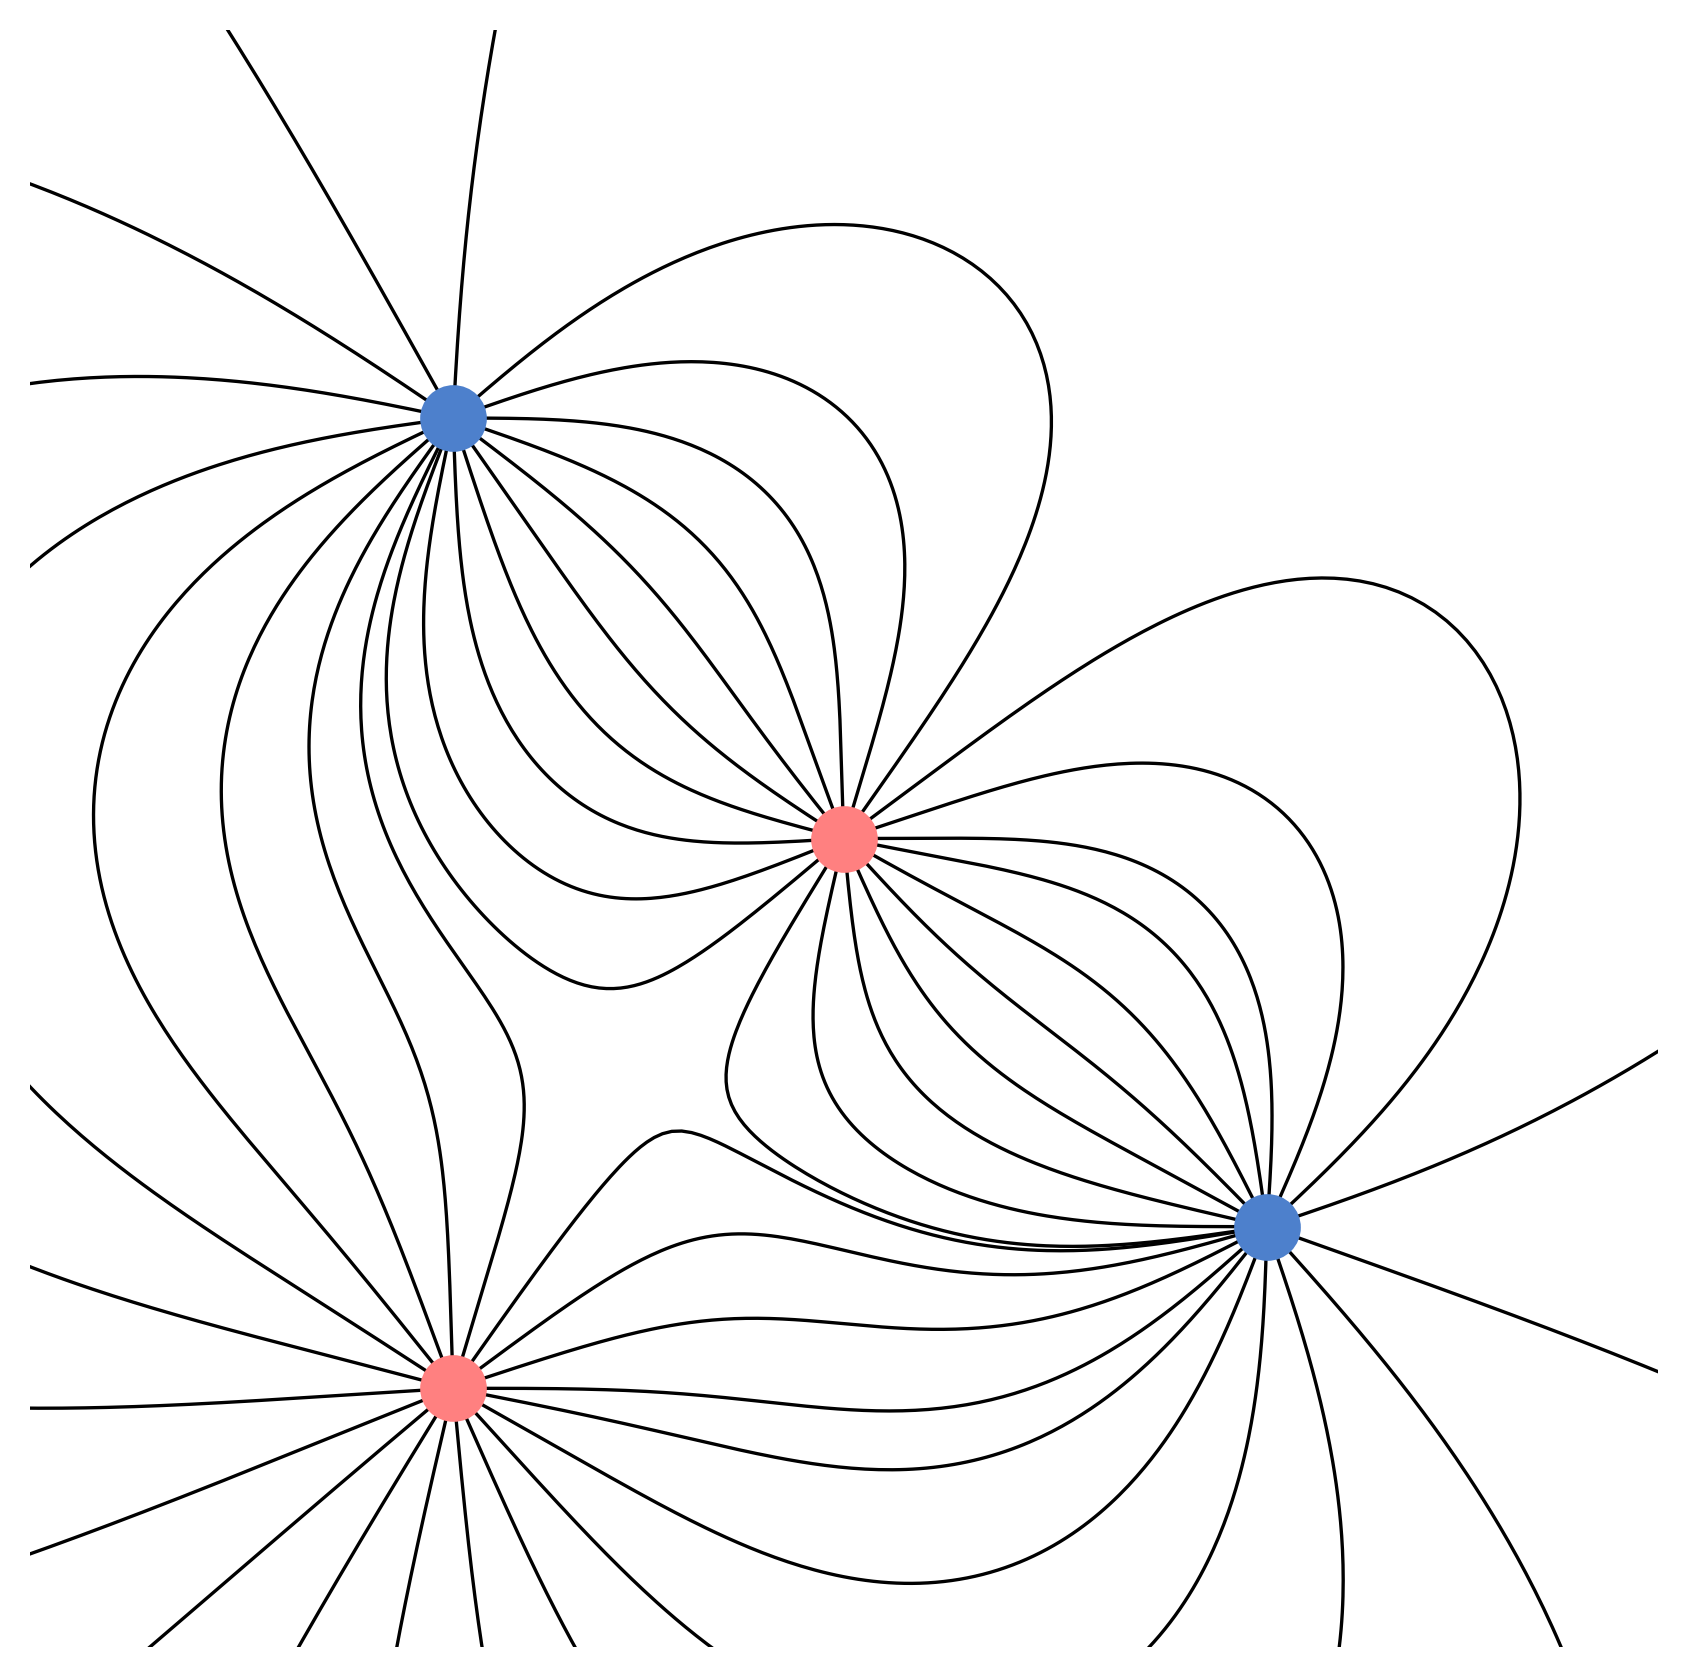

In [189]:
plt.style.use("default")
plt.style.use("seaborn-dark")
plt.style.use("grayscale")

fig = plt.figure(figsize=(7, 7),dpi=300, facecolor="w")
ax = fig.add_subplot(111)

# Zeige die Feldlinien
for x, y in zip(xs,ys):
    ax.plot(x, y, color="k",lw=0.8)

# Zeige die Ladungen
for C in charges:
    if C.q>0:
        ax.plot(C.pos[0], C.pos[1], "o",color = (1,0.5,0.5,1), ms=10*np.sqrt(C.q), markersize=15)
    if C.q<0:
        ax.plot(C.pos[0], C.pos[1],"o",color = (0.3, 0.5, 0.8,1), ms=10*np.sqrt(-C.q), markersize=15)
    
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.patch.set_facecolor('white')
plt.xticks([])
plt.yticks([])
plt.show()